# MCLP (Maximum Covering Location Problem)

#### Import the required modules

In [1]:
from allagash.dataset import DemandDataset, SupplyDataset
from allagash.coverage import Coverage
import pulp
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data

In [2]:
d = DemandDataset(geopandas.read_file("sample_data/demand_point.shp"), "GEOID10", "Population")
s = SupplyDataset(geopandas.read_file("sample_data/facility_service_areas.shp"), "ORIG_ID")
s2 = SupplyDataset(geopandas.read_file("sample_data/facility2_service_areas.shp"), "ORIG_ID")

#### Plot the data

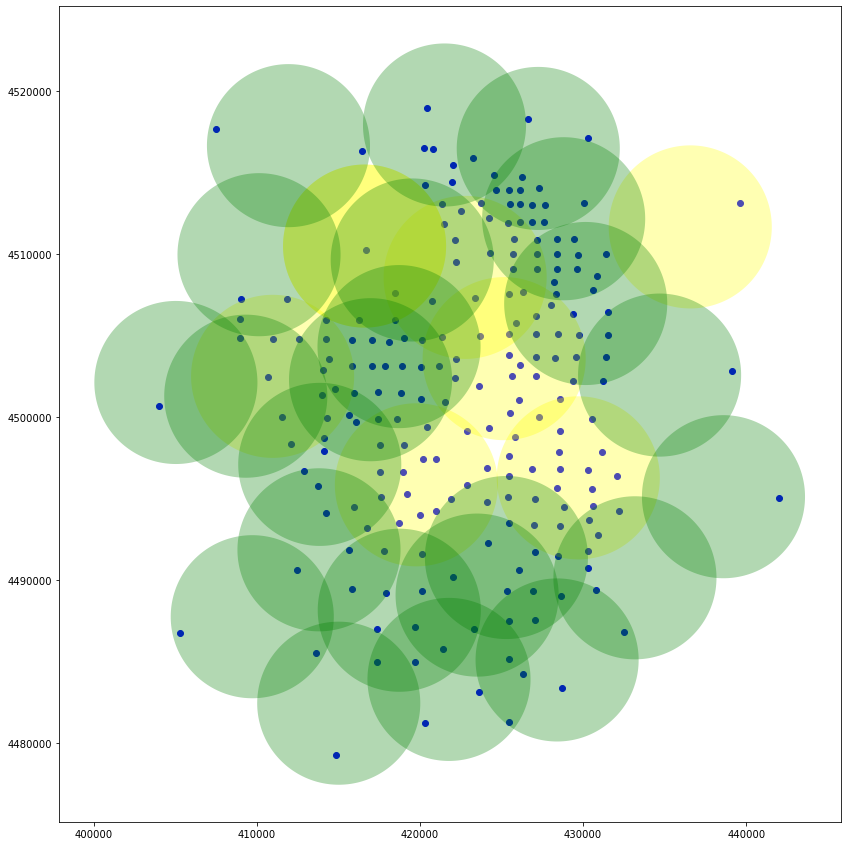

In [3]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
d.df.plot(ax=ax, color='blue')
s.df.plot(ax=ax, color='yellow', alpha=0.3)
s2.df.plot(ax=ax, color='green', alpha=0.3);

#### Create the coverage

In [4]:
coverage = Coverage(d, [s, s2], 'binary')

#### Create the model

In [5]:
model = coverage.create_model('mclp', max_supply={s: 5, s2: 10})

#### Solve the model

In [6]:
solution = model.solve(pulp.GLPK())

#### Plot the selected locations

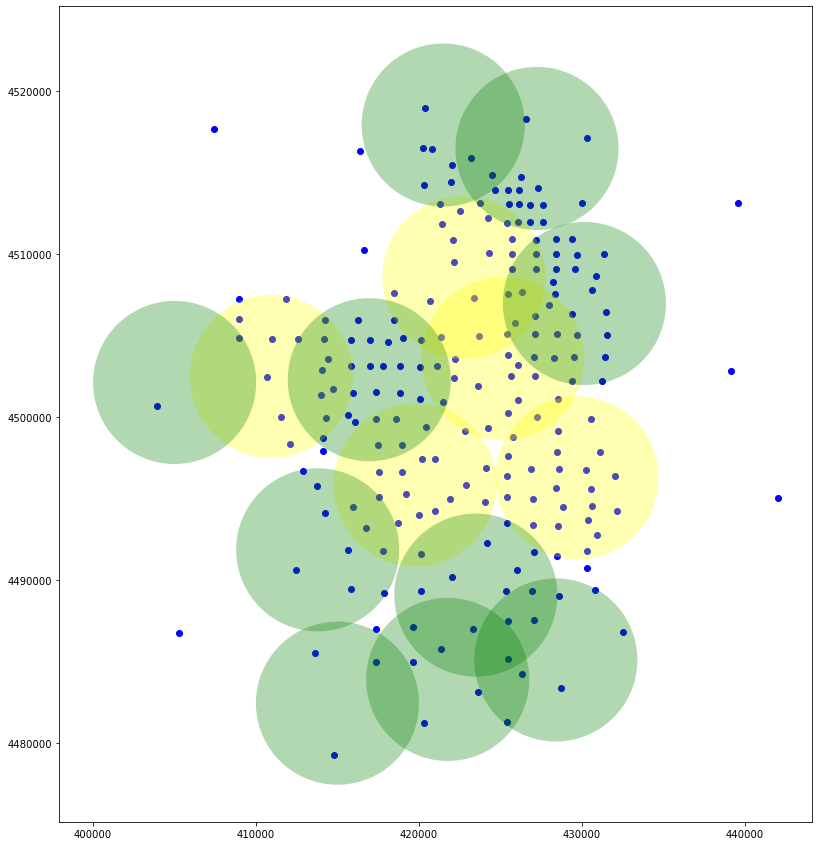

In [7]:
selected_locations = solution.selected_supply(s)
selected_locations2 = solution.selected_supply(s2)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_aspect('equal')
d.df.plot(ax=ax, color='blue')
selected_locations.plot(ax=ax, color='yellow', alpha=0.3)
selected_locations2.plot(ax=ax, color='green', alpha=0.3);

#### Find the total demand that is covered

In [8]:
print(f'{(solution.covered_demand()["Population"].sum() / d.df["Population"].sum()*100):0.2f}%')

95.50%
